In [1]:
import pymaid
import navis
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rm = pymaid.CatmaidInstance(server='https://neurophyla.mrc-lmb.cam.ac.uk/catmaid/drosophila/l1/seymour/#',
                            api_token='7bcc775ddacbc453aed6df4a030c146dcce23b08',
                            project_id=1,
                            http_user='Jovanic', # omit if not required
                            http_password='orioles path') # omit if not required

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [3]:
skids = pymaid.get_skids_by_annotation('DAN-d1')
skids

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[5966099, 3886356]

In [4]:
tn_table = pymaid.get_node_table(skids[0])
tn_table.head()

INFO  : Retrieving 1 node table(s)... (pymaid)
INFO  : 9534 nodes retrieved. Creating table... (pymaid)


Creating table:   0%|          | 0/1 [00:00<?, ?it/s]

,node_id,parent_node_id,confidence,x,y,z,radius,creator,last_edited,skeleton_id,reviewers,tags
0,24977452,13955159,5,32013.1,26913.5,35800.0,-1.0,michael,2022-10-13 10:49:01+00:00,5966099,NaN,NaN
1,24977450,24977451,5,32313.3,27019.9,35600.0,-1.0,michael,2022-10-13 10:48:58+00:00,5966099,NaN,NaN
2,24977449,24977450,5,32503.3,26989.5,35500.0,-1.0,michael,2022-10-13 10:48:58+00:00,5966099,NaN,NaN
3,24977448,24977449,5,32552.7,26962.9,35450.0,-1.0,michael,2022-10-13 10:48:58+00:00,5966099,NaN,NaN
4,24977447,24977448,5,32571.7,27004.7,35400.0,-1.0,michael,2022-10-13 10:48:58+00:00,5966099,NaN,NaN


In [5]:
pymaid.clear_cache()
neuron_list = pymaid.get_neuron(skids)
neuron_list

INFO  : Cached cleared. (pymaid)


Fetch neurons:   0%|          | 0/2 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/2 [00:00<?, ?it/s]

,type,name,skeleton_id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,CatmaidNeuron,MBE4h right,5966099,9534,766,495,530,1.020799e+06,[13946140],1 nanometer
1,CatmaidNeuron,MBE4h left,3886356,7918,727,513,541,9.113199e+05,[3886360],1 nanometer


In [6]:
neuron_list[0].nodes.head()

,node_id,parent_id,creator_id,x,y,z,radius,confidence,type
0,24977452,13955159,74,32013.099609,26913.500000,35800.0,-1.0,5,slab
1,24977450,24977451,74,32313.300781,27019.900391,35600.0,-1.0,5,slab
2,24977449,24977450,74,32503.300781,26989.500000,35500.0,-1.0,5,slab
3,24977448,24977449,74,32552.699219,26962.900391,35450.0,-1.0,5,slab
4,24977447,24977448,74,32571.699219,27004.699219,35400.0,-1.0,5,slab


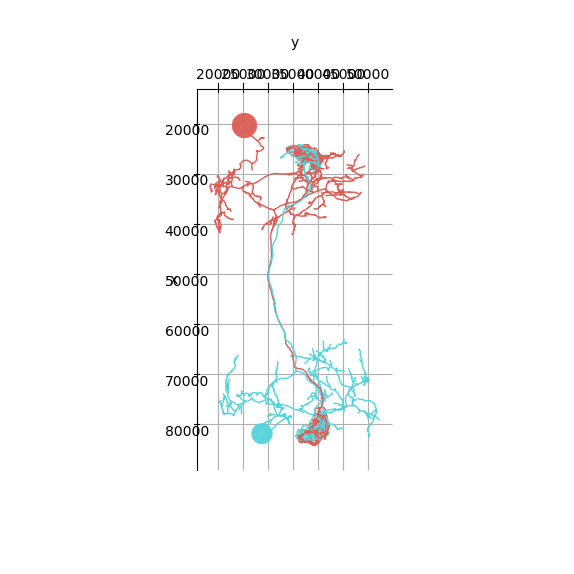

In [7]:
import matplotlib.pyplot as plt
import navis
# Plot using matplotlib's 3D capabilities
fig, ax = navis.plot2d(neuron_list, method='3d_complex')
# Change from default frontal view to lateral view
ax.azim = 0
# Zoom in a bit
ax.dist = 6
plt.show()